In [22]:
%matplotlib notebook
import sys
sys.path.append('../code')

from krr import KernelRidgeRegression
from label_data import LabeledData
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def k_polynomial(x, xp, d):
    return (np.dot(x, xp)+1)**d


def k_gaussian(x, xp, sigma):
    return np.exp(-np.sum((x-xp)**2)/(2*(sigma**2)))


def k_sigmoid(x, xp, kappa, Theta):
    return np.tanh(kappa * np.dot(x, xp) + Theta)

<IPython.core.display.Javascript object>


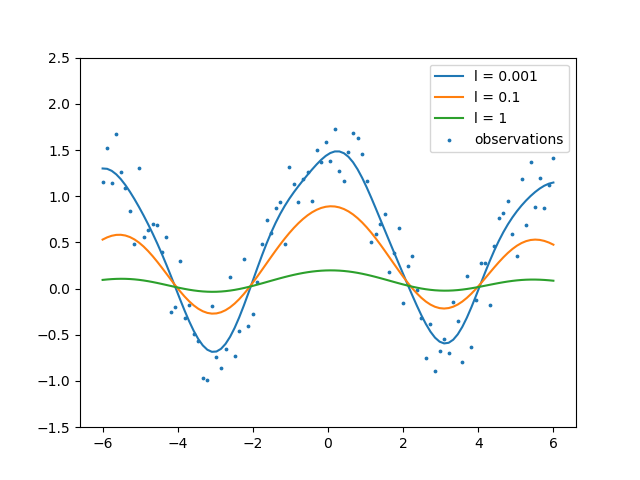

In [33]:
t = np.linspace(-6, 6, 100)
y = np.cos(t) + np.random.rand(t.shape[0])

ld = LabeledData()
ld.add_data(t, y)

kregr = KernelRidgeRegression(ld, k=lambda x,y: k_gaussian(x, y, 1), l=.01)

kregr([0.4])

plt.figure()
plt.scatter(t, y, label='observations', s=3)
kregr.l = 0.001
plt.plot(t, np.array([kregr(float(x)) for x in t]), label='l = 0.001')
kregr.l = 0.1
plt.plot(t, np.array([kregr(float(x)) for x in t]), label='l = 0.1')
kregr.l = 1
plt.plot(t, np.array([kregr(float(x)) for x in t]), label='l = 1')
plt.legend()
plt.ylim(-1.5, 2.5)
plt.show()